<a href="https://colab.research.google.com/github/natanascimento/image-processing/blob/main/ReconhecimentoFacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv

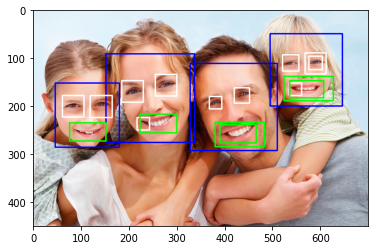

In [6]:
imagem1 = cv.imread('/content/teste1.jpg')
imagemCinza1 = cv.cvtColor(imagem1, cv.COLOR_BGR2GRAY)

classificadorCascadeRosto = cv.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
classificadorCascadeSorriso = cv.CascadeClassifier("/content/haarcascade_smile.xml")
classificadorCascadeOlho = cv.CascadeClassifier("/content/haarcascade_eye.xml")

rostos = classificadorCascadeRosto.detectMultiScale(imagemCinza1, 1.3, 5)
sorriso = classificadorCascadeSorriso.detectMultiScale(imagemCinza1, 1.3, 20)
olhos = classificadorCascadeOlho.detectMultiScale(imagemCinza1, 1.3, 1)

for (x,y,w,h) in rostos:
  cv.rectangle(imagem1,(x,y),(x + w,y + h),(255,0,0),2)
  for (xO,yO,wO,hO) in olhos:
    if( (x <= xO) and (y <= yO) and ( x + w >= xO + wO) and ( y + h >= yO + hO)):
      cv.rectangle(imagem1, (xO,yO),(xO + wO,yO + hO),(255,255,255),2)
  for (xS,yS,wS,hS) in sorriso:
    if( (x <= xS) and (y <= yS) and ( x + w >= xS + wS) and ( y + h >= yS + hS)):
      cv.rectangle(imagem1, (xS, yS),(xS + wS, yS + hS),(0,255,0),2)
plt.imshow(cv.cvtColor(imagem1, cv.COLOR_BGR2RGB))